In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The dataset to be explored has combined primary and secondary school enrollments as well as education revenues and expenditures for all U.S. states and the District of Columbia for the years 1993-2015. The three questions I would like to answer are:
- Which states spend the most/least on students, and which have seen the largest increases and decreases in enrollment?
- Are there differences in the way states spend money between those that spend more per student and those that spend less?
- Are there differences in the way states spend money between those where enrollment has been increasing and those where enrollment has been decreasing?

In [3]:
ed = pd.read_csv('elsect_summary.csv')
ed.head(10)

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688
5,Colorado,1992,NaN,3185173,163253,1307986,1713934,3264826,1642466,1035970,NaN,364760
6,Connecticut,1992,NaN,3834302,143542,1342539,2348221,3721338,2148041,1142600,NaN,48542
7,Delaware,1992,NaN,645233,45945,420942,178346,638784,372722,194915,NaN,30595
8,District of Columbia,1992,NaN,709480,64749,0,644731,742893,329160,316679,NaN,47272
9,Florida,1992,NaN,11506299,788420,5683949,5033930,11305642,5166374,3410440,NaN,1667826


In [4]:
states = sorted([state for state in set(ed['STATE'].values)]) # Get list of states

In [5]:
ed.isnull().sum()

STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
dtype: int64

It is not entirely obvious from the null counts, but they reflect that all 51 "states" (including Washington, D.C.) are missing enrollment and "other expenditure" data for the year 1992. The "other expenditure" data could be imputed as the difference between the total expenditure and the sum of the instruction, support services and capital outlay expenditures, but due to the huge differences in state populations, the only way to make meaningful comparisons among these figures is to convert them to per student, so I will drop the 1992 data from the set.

In [6]:
ed = ed[ed['ENROLL'].notnull()]

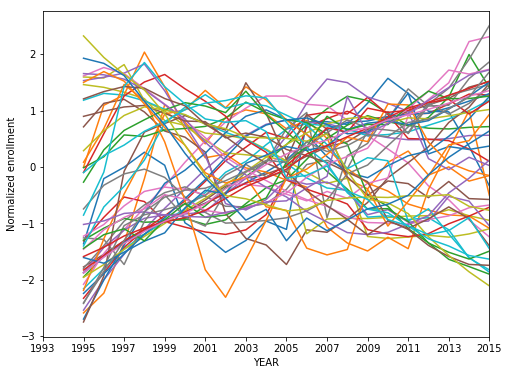

In [45]:
enroll = ed.loc[:, ('STATE', 'YEAR', 'ENROLL')]
normalize = lambda x: (x - x.mean()) / x.std()
enroll['NORMED'] = enroll.groupby('STATE')['ENROLL'].transform(normalize)
fig, ax = plt.subplots(figsize=(8,6))
for label, group in enroll.groupby(['STATE']):
    group.plot(x='YEAR', y='NORMED', ax=ax)
plt.xticks(np.arange(1993, 2016, 2))
plt.gca().legend_.remove()
plt.ylabel('Normalized enrollment')
plt.show()

With the data normalized so the enrollments can be compared on the same scale, a few things can be seen. One is that there is no clear overall trend, although there is a distinct band of steadily increasing enrollment and a another, less distinct band of decreasing enrollment. But there also seem to be a large number of very sharp rises between 1993 and 1995. Subplots confirm this and further show that several of the states with these spikes — Kansas, Nebraska, Oklahoma and others — are not among states known to have had rapid population increases in recent years, such as Arizona and Colorado

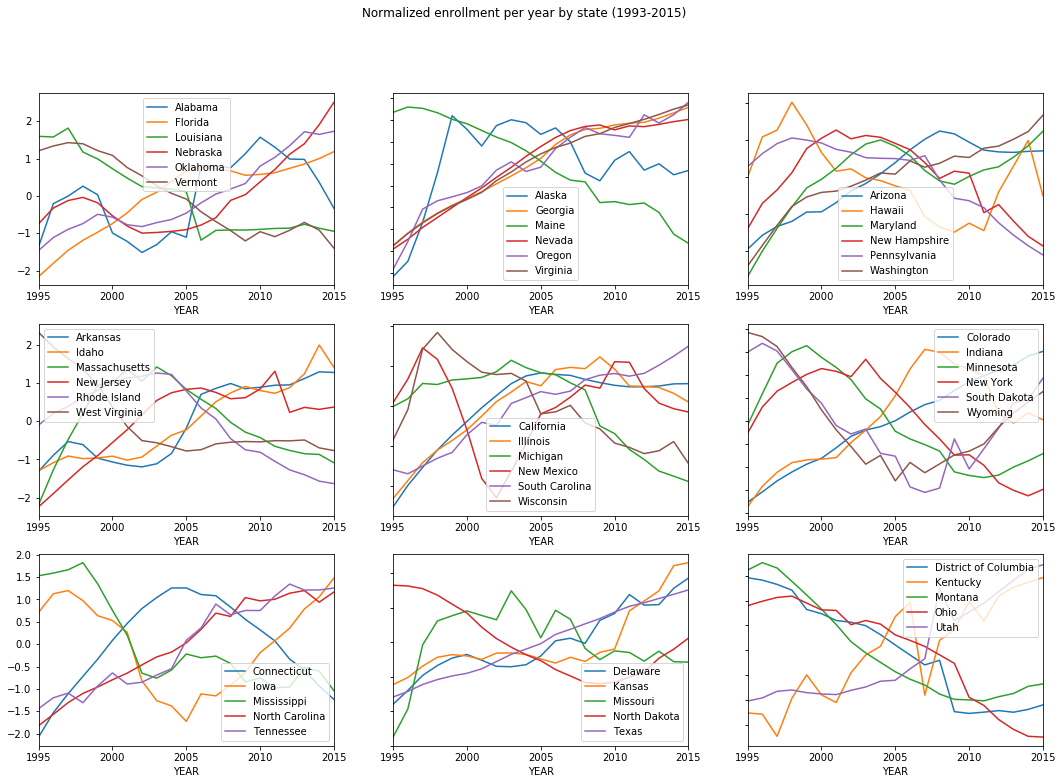

In [48]:
plt.rcParams["figure.figsize"] = [18.0, 12.0]
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9]] = plt.subplots(3, 3)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
ax_dict = {}
plt.setp(axes, xticks=np.arange(1995, 2016, 5))
for ix, state in enumerate(states):
    ax_dict[state] = axes[ix % 9]
for label, group in enroll.groupby(['STATE']):
    group.plot(x='YEAR', y='NORMED', ax=ax_dict[label], label=label, sharey=True)
fig.suptitle('Normalized enrollment per year by state (1993-2015)')
plt.show()

Without corroborating data as to why there should be such sharp increases in enrollment in such a short time, I would consider these to be anomalies, perhaps resulting from incomplete data. Since I am looking primarily at per student statistics, these anomalies would skew the analysis, so I will drop 1993 and 1994 from the dataset.

In [9]:
ed = ed[~ed['YEAR'].isin([1993, 1994])] 

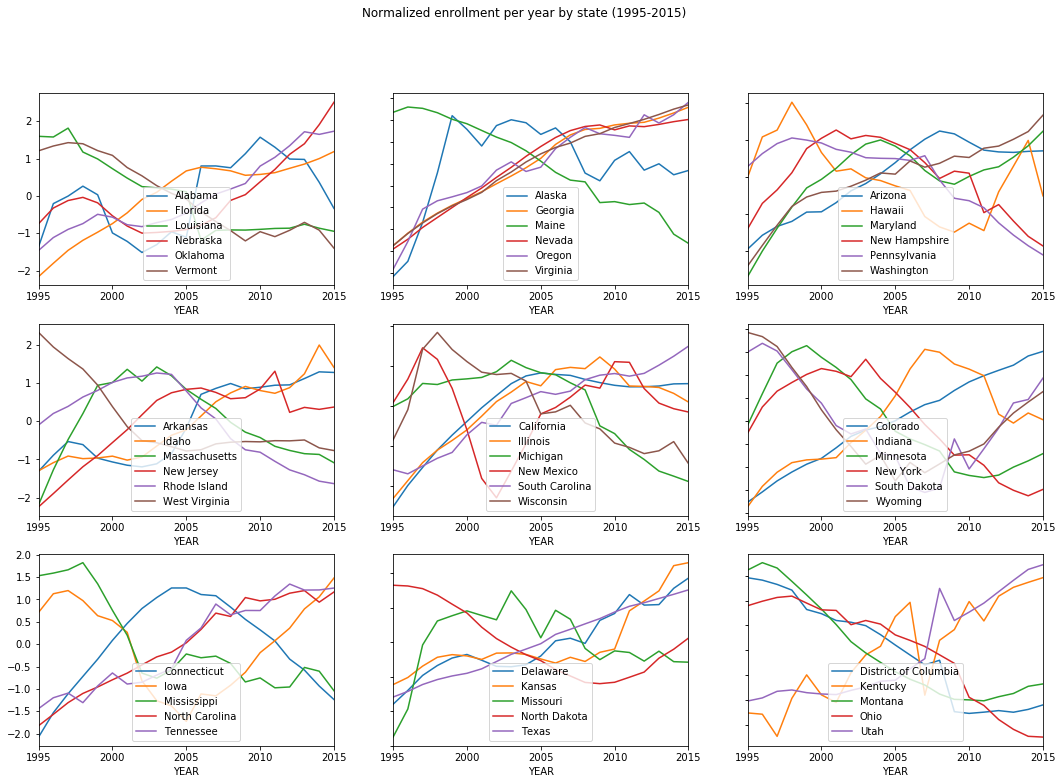

In [49]:
enroll = ed.loc[:, ('STATE', 'YEAR', 'ENROLL')]
normalize = lambda x: (x - x.mean()) / x.std()
enroll['NORMED'] = enroll.groupby('STATE')['ENROLL'].transform(normalize)
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9]] = plt.subplots(3, 3)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
ax_dict = {}
plt.setp(axes, xticks=np.arange(1995, 2016, 5))
for ix, state in enumerate(states):
    ax_dict[state] = axes[ix % 9]
for label, group in enroll.groupby(['STATE']):
    group.plot(x='YEAR', y='NORMED', ax=ax_dict[label], label=label, sharey=True)
for ax in axes:
    ax.legend(loc='lower center')
fig.suptitle('Normalized enrollment per year by state (1995-2015)')
plt.show()

Some of the remaining steep changes could be correlated with events. For instance, the sharp increase in Alaska's enrollment between 1995 and 1999 corresponds to the 1996 lifting of the congressional ban on the export of Alaskan crude oil. Other correlations would include the rise of the tech industries in Colorado, Oregon and Washington, and the large number of dropoffs around the 2008 financial ctrisis. But an interesting takeaway from these plots in terms of analysis is that with few exceptions — Connecticut, Iowa, Massachusetts, Minnesota, New Mexico, South Dakota — the initial and final values reflect the 20-year trend in the state relatively well. This will be useful for further analysis.

In [11]:
per_student = ed.copy()

In [12]:
cols = [col for col in per_student.columns if pd.api.types.is_numeric_dtype(per_student[col]) and
        col not in ['YEAR', 'ENROLL']]
for col in cols:
    per_student[col] = per_student[col] / per_student['ENROLL']

In [13]:
per_student.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
153,Alabama,1995,727480.0,4.628907,0.452187,2.971032,1.205688,4.609560,2.545362,1.222003,0.449436,0.334532
154,Alaska,1995,125421.0,8.906547,0.980992,5.661157,2.264398,9.598209,4.113458,3.740083,0.299623,1.268894
155,Arizona,1995,735018.0,5.190646,0.512147,2.270928,2.407571,5.518612,2.411353,1.538800,0.308165,0.966146
156,Arkansas,1995,447757.0,4.595238,0.441213,2.779313,1.374712,4.813028,2.704719,1.335789,0.267855,0.358884
157,California,1995,5299405.0,5.568967,0.492931,2.932685,2.143351,5.679420,3.046836,1.623532,0.411566,0.503692


In [14]:
avg_exp_per = per_student[['STATE', 'TOTAL_EXPENDITURE']].groupby('STATE').mean()

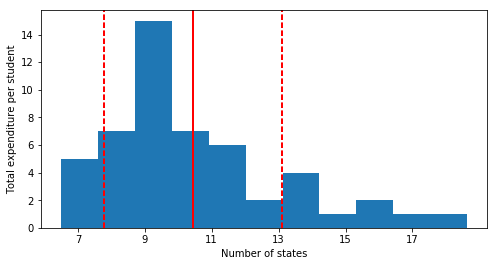

In [50]:
plt.rcParams["figure.figsize"] = [8.0, 4.0]

var = avg_exp_per['TOTAL_EXPENDITURE']
plt.hist(var, bins=11)
plt.xticks(np.arange(7, 18, 2))
plt.axvline(var.mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(var.mean() + var.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(var.mean() - var.std(), color='r', linestyle='dashed', linewidth=2)
plt.xlabel('Number of states')
plt.ylabel('Total expenditure per student')

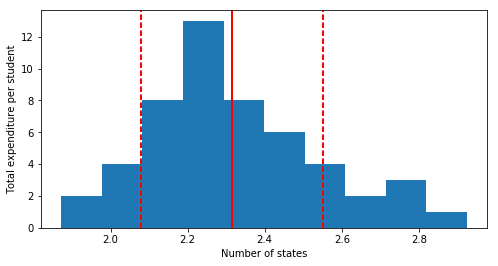

In [51]:
var_log = np.log(avg_exp_per['TOTAL_EXPENDITURE'])
plt.hist(var_log)
plt.axvline(var_log.mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(var_log.mean() + var_log.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(var_log.mean() - var_log.std(), color='r', linestyle='dashed', linewidth=2)
plt.xlabel('Number of states')
plt.ylabel('Total expenditure per student')

Taking the log of total expenditures per student produces a very nearly normal distribution if the high-end outliers are ignored. It would be interesting to investigate those outliers separately, and they will be the same with or without the log transformation. The normality of the transformed data would be useful for performing linear regression on it.

In [17]:
avg_exp_per.sort_values(by='TOTAL_EXPENDITURE', ascending=False).head(5)

,TOTAL_EXPENDITURE
STATE,
District of Columbia,18.633862
New York,16.764482
Vermont,16.355866
New Jersey,16.064029
Alaska,14.380415


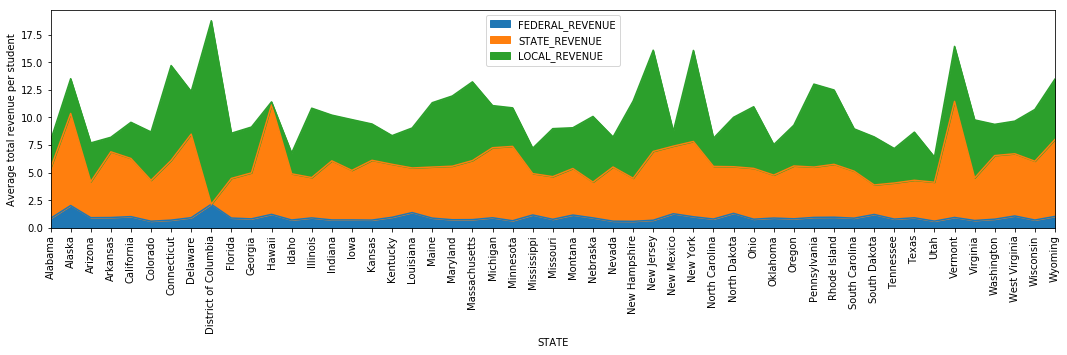

In [57]:
plt.rcParams["figure.figsize"] = [18.0, 4.0]
type_rev = per_student.loc[:, ('STATE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE')]\
        .groupby('STATE').mean()
type_rev.plot(kind='area')
plt.xticks(np.arange(51), states, rotation=90)
plt.ylabel('Average total revenue per student')
plt.show()

Clearly, federal funding is the smallest component of education spending in every state, and is relatively constant across the board. The two notable exceptions are Alaska, which as already noted is an exceptional case, and the District of Columbia, which has no state income. And while the state contribution varies, it seems that the states with the highest total revenue per student are the ones with the highest local revenue per student, and hence the highest expenditure per student. A cursory glance at the ed dataframe shows that revenue and expenditure are almost the same, as one would expect. More granular trends might reveal themselves by comparing states with the highest and lowest expenditures per student as well as states with the greatest increases and decreases in enrollment. 

In [19]:
high_exp = list(avg_exp_per.sort_values(by='TOTAL_EXPENDITURE', ascending=False).head(10).index)
high_exp

['District of Columbia',
 'New York',
 'Vermont',
 'New Jersey',
 'Alaska',
 'Connecticut',
 'Pennsylvania',
 'Wyoming',
 'Massachusetts',
 'Delaware']

These are the 10 states with the highest average expenditure per student. With the exception of Alaska and Wyoming, all are in the Middle Atlantic and Northeast.

In [20]:
low_exp = list(avg_exp_per.sort_values(by='TOTAL_EXPENDITURE').head(10).index)
low_exp

['Utah',
 'Idaho',
 'Mississippi',
 'Oklahoma',
 'Tennessee',
 'Arizona',
 'North Carolina',
 'Alabama',
 'South Dakota',
 'Arkansas']

And these are the 10 states with the lowest average expenditure per student.

In [21]:
enroll_change = pd.DataFrame(index=states)
enroll_change['IN 2015'] = list(enroll[enroll['YEAR'] == 2015]['NORMED'])
enroll_change['IN 1995'] = list(enroll[enroll['YEAR'] == 1995]['NORMED'])
enroll_change['CHANGE'] = enroll_change['IN 2015'] - enroll_change['IN 1995']

In [22]:
high_enr = list(enroll_change.sort_values(by='CHANGE', ascending=False).head(10).index)
high_enr

['Washington',
 'Maryland',
 'Oregon',
 'Delaware',
 'Kansas',
 'Florida',
 'Colorado',
 'Nebraska',
 'Virginia',
 'Oklahoma']

These are the 10 states with the greatest percentage increase in enrollment. Only Delaware appears among the states with the highest expenditure per student, and none appear among the states with the lowest.

In [23]:
low_enr = list(enroll_change.sort_values(by='CHANGE').head(10).index)
low_enr

['West Virginia',
 'Maine',
 'Ohio',
 'Vermont',
 'Mississippi',
 'District of Columbia',
 'Louisiana',
 'Pennsylvania',
 'Montana',
 'Michigan']

And these are the 10 with the greatest decrease in enrollment. Three of them — Vermont, District of Columbia, Pennsylvania — appear among the states with the highest per capita expenditure, and none among the states with the lowest.

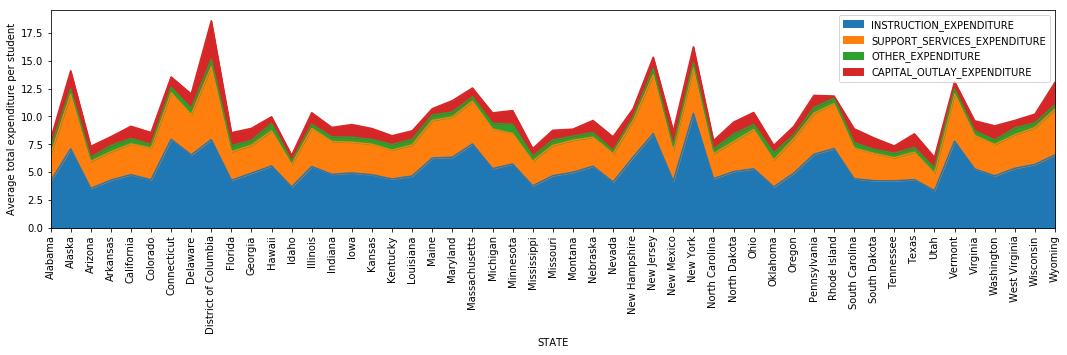

In [58]:
type_exp = per_student.loc[:, ('STATE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
                               'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE')]\
        .groupby('STATE').mean()
type_exp.plot(kind='area')
plt.xticks(np.arange(51), states, rotation=90)
plt.ylabel('Average total expenditure per student')
plt.show()

Instruction expenditure is clearly the largest component, exceeding the others combined in all cases except D.C., and possibly New Jersey.

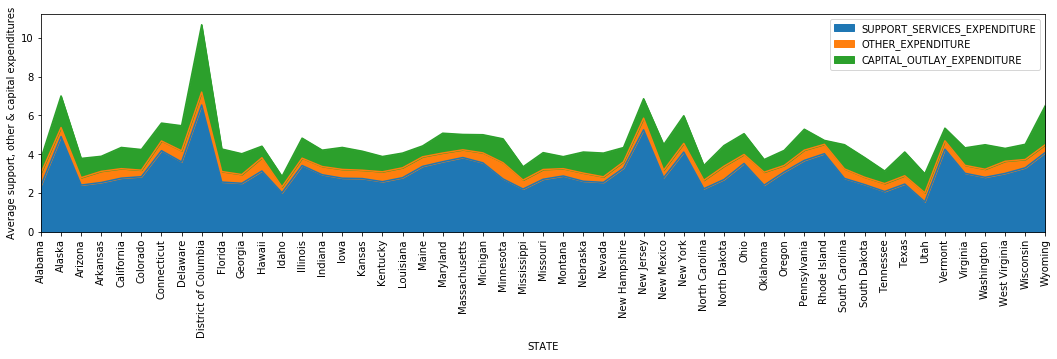

In [60]:
type_exp2 = per_student.loc[:, ('STATE', 'SUPPORT_SERVICES_EXPENDITURE',
                               'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE')]\
        .groupby('STATE').mean()
type_exp2.plot(kind='area')
plt.xticks(np.arange(51), states, rotation=90)
plt.ylabel('Average support, other & capital expenditures')
plt.show()

The support expenditures can be seen to closely follow the instruction expenditures.

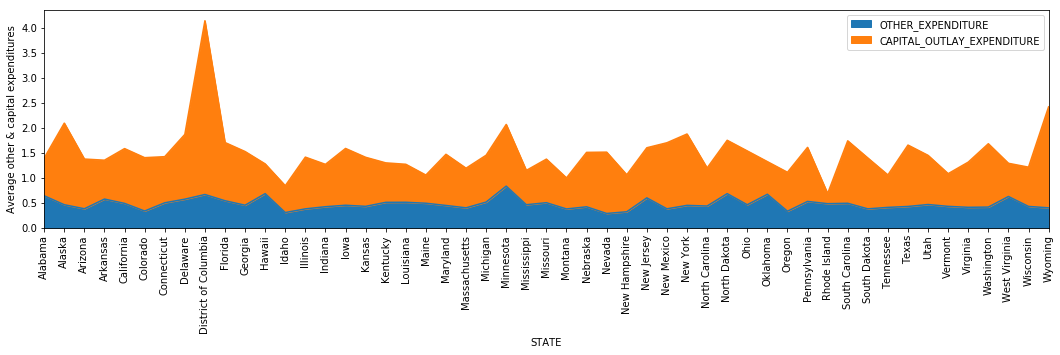

In [61]:
type_exp3 = per_student.loc[:, ('STATE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE')].groupby('STATE').mean()
type_exp3.plot(kind='area')
plt.xticks(np.arange(51), states, rotation=90)
plt.ylabel('Average other & capital expenditures')
plt.show()

Other expenditures vary so little and account for so little of the total, that they can effectively be ignored.

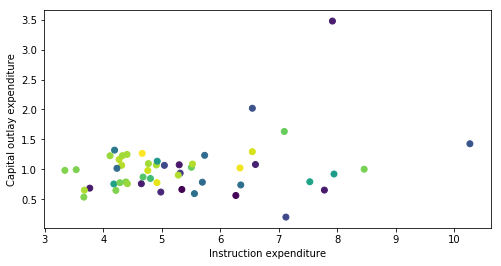

In [62]:
plt.rcParams["figure.figsize"] = [8.0, 4.0]
plt.scatter(x=type_exp['INSTRUCTION_EXPENDITURE'], y=type_exp['CAPITAL_OUTLAY_EXPENDITURE'], c=enroll_change['CHANGE'])
plt.xlabel('Instruction expenditure')
plt.ylabel('Capital outlay expenditure')
plt.show()

Interestingly, there is no obvious correlation between the average main expenditures and change in enrollment, for which the lighter the color, the larger the decrease; and the darker the color, the larger the increase. Let's look at the trend over time for the states with the largest enrollment increases and decreases.

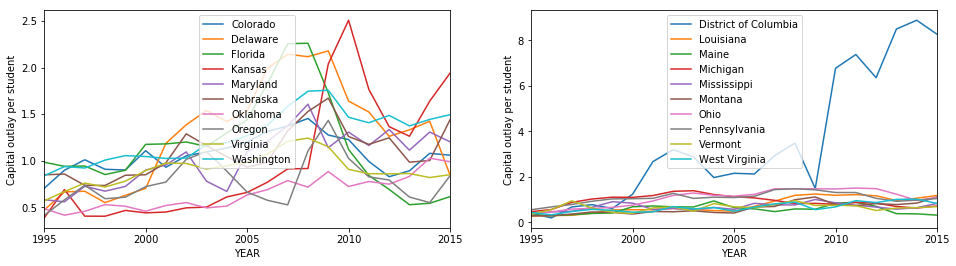

In [69]:
plt.rcParams["figure.figsize"] = [16.0, 4.0]
fig, (ax1, ax2) = plt.subplots(1, 2)
high_enr_per = per_student[per_student['STATE'].isin(high_enr)]
low_enr_per = per_student[per_student['STATE'].isin(low_enr)]
for label, group in high_enr_per.groupby(['STATE']):
    group.plot(x='YEAR', y='CAPITAL_OUTLAY_EXPENDITURE', ax=ax1, label=label)
for label, group in low_enr_per.groupby(['STATE']):
    group.plot(x='YEAR', y='CAPITAL_OUTLAY_EXPENDITURE', ax=ax2, label=label)
axes = (ax1, ax2)
plt.setp(axes, xticks=np.arange(1995, 2016, 5), ylabel='Capital outlay per student')
ax1.legend(loc='upper center')
ax2.legend(loc='upper center')
plt.show()

A definite but slight upward trend can be seen for capital expenditure pre student in the states with the largest increases in enrollment, which could account for expanding old or building new facilities. For states with large decreases in enrollment, the per student capital expenditure basically remained constant, which also is reasonable considering that this would mean an overall decrease in spending proportional to the decrease in enrollment. The exception here, as throughout, is D.C., which combined the highest decrease in enrollment with the largest increase in capital outlay, something worth looking into.

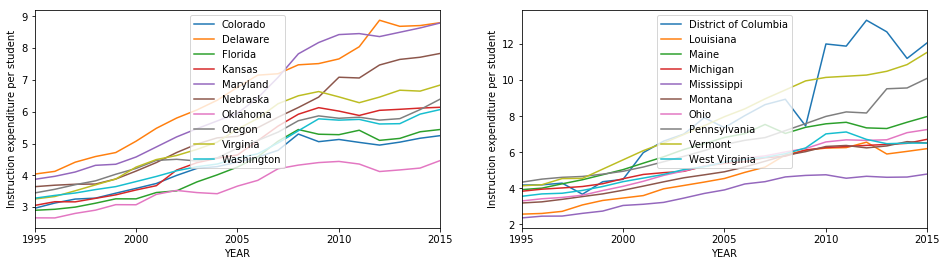

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2)
high_enr_per = per_student[per_student['STATE'].isin(high_enr)]
low_enr_per = per_student[per_student['STATE'].isin(low_enr)]
for label, group in high_enr_per.groupby(['STATE']):
    group.plot(x='YEAR', y='INSTRUCTION_EXPENDITURE', ax=ax1, label=label)
for label, group in low_enr_per.groupby(['STATE']):
    group.plot(x='YEAR', y='INSTRUCTION_EXPENDITURE', ax=ax2, label=label)
axes = (ax1, ax2)
plt.setp(axes, xticks=np.arange(1995, 2016, 5), ylabel='Instruction expenditure per student')
ax1.legend(loc='upper center')
ax2.legend(loc='upper center')
plt.show()

Spending on instruction for students trends in almost exactly the same way regardless of increasing or decreasing enrollment, suggesting that this expenditure might have been budgeted on a per student basis with an inflationary adjustment. (Vermont joins D.C. as an outlier here.) Interestingly, inflation amounted to 55.5% for the period 1995-2015 (according to http://www.usinflationcalculator.com/), so spending on instruction per student showed a real dollar increase across the board. In order to look at the effect of per capita income on education spending, I will bring in state ranking according to per capita income based on government data.

In [36]:
year_2014 = per_student.loc[lambda df: df['YEAR'] == 2014, :]

In [38]:
len(year_2014)

51

In [42]:
year_2014['ASCENDING_INCOME'] = np.array([45,9,42,43,12,15,2,21,1,29,41,22,48,18,39,25,26,46,31,34,8,3,36,14,51,32,38,19,35,10,4,
                          47,6,40,5,30,28,33,17,19,49,24,37,23,44,20,11,13,50,27,7])

/Users/vince/anaconda/envs/aind/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


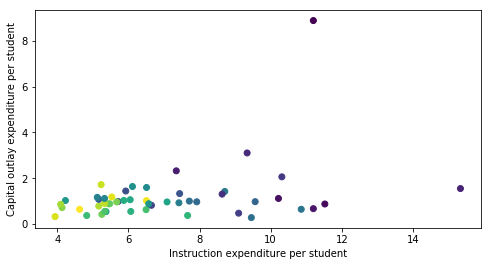

In [68]:
plt.rcParams["figure.figsize"] = [8.0, 4.0]
plt.scatter(x=year_2014['INSTRUCTION_EXPENDITURE'], y=year_2014['CAPITAL_OUTLAY_EXPENDITURE'], c=year_2014['ASCENDING_INCOME'])
plt.xlabel('Instruction expenditure per student')
plt.ylabel('Capital outlay expenditure per student')
plt.show()

Now we see a pretty direct relationship between income per capita, and instructional and capital outlay expenditures per student.

In the end, the data does not hold any surprises. Education spending per student is highest in states with the highest per capita income, although it is perhaps interresting to note that spending on education increased in real dollars over the period 1995-2015 regardless of total expenditure or enrollment changes. The increase was greatest in states with the largest increases in enrollment, where capital outlay expenditures also increased. Federal spending was relatively constant among the states, which helps explain why per-student expenditure correlated directly with per-capita income, since local/state revenue was the differentiating factor. One thing that emerges from the analysis is that the District of Columbia is an outlier in many ways, so I would recommend removing it from any group analysis and treating it separately.  

On its own, this dataset seems to have limited value. But as shown in the final graph that uses additional income data, there is great potential for combining it with other data sources. Any such analysis could be made more granular by using the full dataset, of which the one used in this exploration is a summary aggregated by state. The full set has data by school district. Some possible correlations that could prove interesting would be between spending and standardized test scores (in particular the SAT or ACT since these are nationally standardized), high-school graduation rates and level of post-secondary education. 